# Random forest for binary classification

The first model we'll train is a simple random forest model.\
We'll perform binary classification on Y (with the threshold at Y = 50), and we'll use the following variables:

- PCA1 and PCA2 (PCA projection of X4, X5 and X6)
- X2_X3_encoding (categorical encoding of all unique X2 X3 sequence pairs)
- weighting the minority class (Y < 50) 3 times as much as the majority class (Y > 50) - roughly the relative frequency of the classes

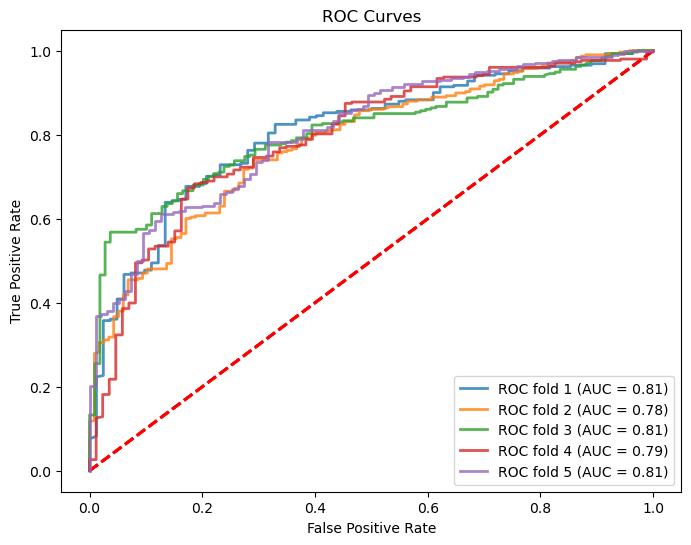

accuracy: 
 0.7438421201950861

precision: 
 0.875702442418198

recall: 
 0.7693732440505918

f1: 
 0.8183524007601329

auc: 
 0.7998762355980708

confusion_matrix: 
 [[0.67241379 0.32758621]
 [0.23062676 0.76937324]]



In [91]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# Load the data
data = pd.read_json("preprocessed_data.json")

# Separate the features and labels
rf_y = data["Y_binary"]*1
rf_X = data[["PCA1", "PCA2", "X2_X3_encoding"]]

# One-hot encode X2_X3_encoding column
rf_X = pd.get_dummies(rf_X, columns=["X2_X3_encoding"])

# Use "fold" column for specifying the cross-validation splits
fold_indices = [data["fold"].values == i for i in range(5)]

# Initialize a dictionary to store the metrics for each fold
metrics_dict = {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "confusion_matrix": []}

# Perform cross-validation
plt.figure(figsize=(8, 6))

for i in range(5):
    # Split the data into training and testing sets for this fold
    X_train = rf_X.loc[~fold_indices[i], :]
    X_test = rf_X.loc[fold_indices[i], :]
    y_train = rf_y.loc[~fold_indices[i]]
    y_test = rf_y.loc[fold_indices[i]]

    # Train a random forest classifier on the training data for this fold
    clf = RandomForestClassifier(n_estimators=100,
                                 max_depth=10,
                                 random_state=0,
                                 class_weight={0:3, 1:1})
                              
    clf.fit(X_train, y_train)

    # Predict the labels for the testing data and calculate the metrics for this fold
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    cm = confusion_matrix(y_test, y_pred, normalize="true")

    # Store the metrics for this fold in the dictionary
    metrics_dict["accuracy"].append(accuracy)
    metrics_dict["precision"].append(precision)
    metrics_dict["recall"].append(recall)
    metrics_dict["f1"].append(f1)
    metrics_dict["auc"].append(roc_auc)
    metrics_dict["confusion_matrix"].append(cm)

    # Plot the ROC curve for this fold
    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=.8)
    plt.plot(fpr, tpr, lw=2, alpha=0.8, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

# Show all the ROC curves
plt.title(f"ROC Curves")
plt.show()

# Print the metrics
for metric in ["accuracy", "precision", "recall", "f1", "auc", "confusion_matrix"]:
    print(f"{metric}: \n {sum(metrics_dict[metric])/5}\n")

The results seems to be quite satisfying for such a simple model. \
There is a small bias towards classifying the samples as Y > 50, and the true positive rate is also ~10% higher than the true negative rate.

# Random forest regression
We can also use random forest for regression

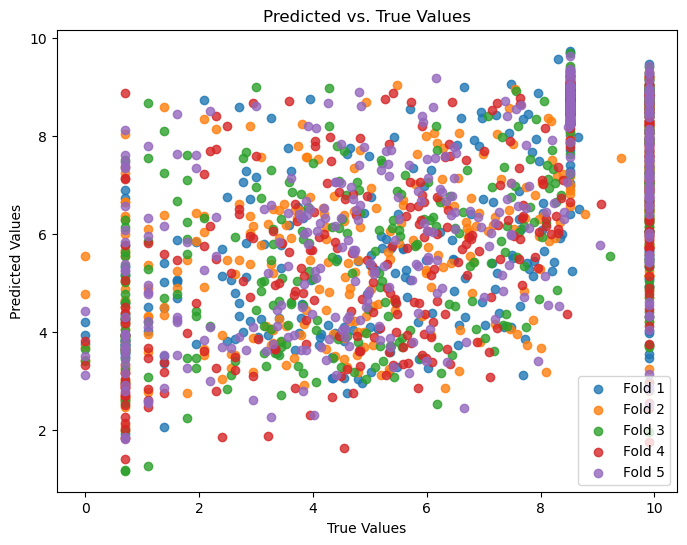

r2: 0.35
mse: 6.24
mae: 1.92


In [635]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_json("preprocessed_data.json")

# Separate the features and labels
rf_y = data["log(Y+1)"]
rf_X = data[["PCA1", "PCA2", "X2_X3_encoding"]]

# One-hot encode X2_X3_encoding column
rf_X = pd.get_dummies(rf_X, columns=["X2_X3_encoding"])

# Use "fold" column for specifying the cross-validation splits
fold_indices = [data["fold"].values == i for i in range(5)]

# Initialize a dictionary to store the metrics for each fold
metrics_dict = {"r2": [], "mse": [], "mae": []}

# Perform cross-validation
plt.figure(figsize=(8, 6))

for i in range(5):
    # Split the data into training and testing sets for this fold
    X_train = rf_X.loc[~fold_indices[i], :]
    X_test = rf_X.loc[fold_indices[i], :]
    y_train = rf_y.loc[~fold_indices[i]]
    y_test = rf_y.loc[fold_indices[i]]

    # Train a random forest regressor on the training data for this fold
    clf = RandomForestRegressor(n_estimators=100,
                                 max_depth=10,
                                 random_state=0)
                              
    clf.fit(X_train, y_train)

    # Predict the labels for the testing data and calculate the metrics for this fold
    y_pred = clf.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store the metrics for this fold in the dictionary
    metrics_dict["r2"].append(r2)
    metrics_dict["mse"].append(mse)
    metrics_dict["mae"].append(mae)

    # Plot the predicted vs. true values for this fold
    plt.scatter(y_test, y_pred, alpha=0.8, label=f'Fold {i+1}')

# Show the scatter plot of predicted vs. true values
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend(loc="lower right")
plt.title(f"Predicted vs. True Values")
plt.show()

# Print the metrics
for metric in ["r2", "mse", "mae"]:
    print(f"{metric}: {sum(metrics_dict[metric])/5:.2f}")


# Simple neural network for classification

The next model we'll train is a simple neural network model.\
We'll perform binary classification on Y (with the threshold at Y = 50), and we'll use the following variables:

- PCA1 and PCA2 (PCA projection of X4, X5 and X6)
- X2_X3_encoding (categorical encoding of all unique X2 X3 sequence pairs)
- weighting the minority class (Y < 50) 3 times as much as the majority class (Y > 50) - roughly the relative frequency of the classes

In [325]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

    
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 1)
        self.droput = nn.Dropout(p=.25)
        

    def forward(self, x):
        x = nn.ReLU()(self.fc1(x))
        x = nn.ReLU()(self.fc2(x))
        x = nn.ReLU()(self.fc3(x))
        x = self.droput(x)
        x = self.fc4(x)
        return x
    
# Define the dataset class
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

training fold 0


100%|██████████| 100/100 [00:13<00:00,  7.25it/s]


evaluation fold 0
accuracy: 0.6997319034852547
precision: 0.8977777777777778
recall: 0.6941580756013745
training fold 1


100%|██████████| 100/100 [00:15<00:00,  6.26it/s]


evaluation fold 1
accuracy: 0.7082352941176471
precision: 0.868
recall: 0.7045454545454546
training fold 2


100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


evaluation fold 2
accuracy: 0.7270471464019851
precision: 0.8801652892561983
recall: 0.7244897959183674
training fold 3


100%|██████████| 100/100 [00:15<00:00,  6.31it/s]


evaluation fold 3
accuracy: 0.7017994858611826
precision: 0.9230769230769231
recall: 0.6732673267326733
training fold 4


100%|██████████| 100/100 [00:16<00:00,  6.03it/s]


evaluation fold 4
accuracy: 0.6819407008086253
precision: 0.8691588785046729
recall: 0.6739130434782609


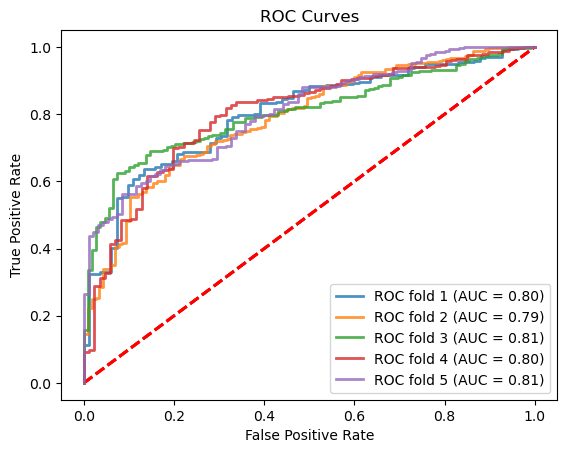

accuracy: 
 0.703750906134939

precision: 
 0.8876357737231144

recall: 
 0.6940747392552262

f1: 
 0.7786618522565465

auc: 
 0.8009327294240632

confusion_matrix: 
 [[0.73579892 0.26420108]
 [0.30592526 0.69407474]]



In [340]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_json("preprocessed_data.json")

# Separate the features and labels
nn_y = data["Y"]

nn_y = (nn_y > 50).astype(int)

nn_X = data[["PCA1", "PCA2", "X2_X3_encoding"]]

# One-hot encode X2_X3_encoding column
nn_X = pd.get_dummies(nn_X, columns=["X2_X3_encoding"])

# Use "fold" column for specifying the cross-validation splits
fold_indices = [data["fold"].values == i for i in range(5)]

# Initialize a dictionary to store the metrics for each fold
metrics_dict = {"mse": [], "L1": []}

# Define the hyperparameters
learning_rate = 1e-4
n_epochs = 100
batch_size = 32

metrics_dict = {"accuracy": [], "precision": [], "recall": [], "f1": [], "auc": [], "confusion_matrix": []}

# Perform cross-validation
for i in range(5):

    # Split the data into training and testing sets for this fold
    X_train = nn_X.loc[~fold_indices[i], :]
    X_test = nn_X.loc[fold_indices[i], :]
    y_train = nn_y.loc[~fold_indices[i]]
    y_test = nn_y.loc[fold_indices[i]]

    # Create PyTorch datasets and data loaders
    train_dataset = MyDataset(X_train, y_train)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_dataset = MyDataset(X_test, y_test)
    test_loader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)

    # Initialize the neural network and optimizer
    net = SimpleNet()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

    # Train the neural network
    print(f"training fold {i}")
    net.train()
    for epoch in tqdm(range(n_epochs)):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = net(X_batch)
            weights = (y_batch-1).abs()*2 + 1
            loss = nn.BCEWithLogitsLoss(weight=weights)(y_pred, y_batch)
            loss.backward()
            optimizer.step()

    
    #Evaluate the neural network on the testing data for this fold
    print(f"evaluation fold {i}")
    net.eval()
    with torch.no_grad():
        for X_batch, y_test in test_loader:
            y_pred_proba = net(X_batch)
            y_pred = nn.Sigmoid()(y_pred_proba)
            y_pred = (y_pred >= 0.5)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    cm = confusion_matrix(y_test, y_pred, normalize="true")

    # Store the metrics for this fold in the dictionary
    metrics_dict["accuracy"].append(accuracy)
    metrics_dict["precision"].append(precision)
    metrics_dict["recall"].append(recall)
    metrics_dict["f1"].append(f1)
    metrics_dict["auc"].append(roc_auc)
    metrics_dict["confusion_matrix"].append(cm)

    for key in ["accuracy", "precision", "recall"]:
        print(f"{key}: {metrics_dict[key][-1]}")

    # Plot the ROC curve for this fold
    plt.plot([0, 1], [0, 1], linestyle="--", lw=2, color="r", alpha=.8)
    plt.plot(fpr, tpr, lw=2, alpha=0.8, label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")

# Show all the ROC curves
plt.title(f"ROC Curves")
plt.show()

# Print the metrics
for metric in ["accuracy", "precision", "recall", "f1", "auc", "confusion_matrix"]:
    print(f"{metric}: \n {sum(metrics_dict[metric])/5}\n")

The results from this model is quite similar to the ones we got from the random forest model.
* The accuracy is 4 % lower
* The precision is 1 % higher
* The recall is 10 % lower
* The f1 score is 3 % lower
* The true negative rate is 7 % higher
* The true postivie rate is 8 % lower

All in all the choice between these two models in their current form depends on the relative importance between false positives and false negatives for the usecase of the data.

# Simple neural network for regression
The next model will be a simple feed forward neural network using the following variables

- PCA1 and PCA2 (PCA projection of X4, X5 and X6)
- X2_X3_encoding (categorical encoding of all unique X2 X3 sequence pairs)
- weighting the minority class (Y < 50) 3 times as much as the majority class (Y > 50) - roughly the relative frequency of the classes

I will use it to predict the log transformed Y values

In [619]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Define the neural network
class SimpleNet(nn.Module):
    def __init__(self,input_dim=13):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 1)
        #self.droput = nn.Dropout(p=.3)
        

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        #x = self.droput(x)
        x = self.fc3(x)
        return x

# Define the dataset class
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [627]:
data = pd.read_json("preprocessed_data.json")
#data = data.sample(32)

# Separate the features and labels
nn_y = data["log(Y+1)"]
nn_X = data[["PCA1", "PCA2", "X2_X3_encoding"]]

# One-hot encode X2_X3_encoding column
nn_X = pd.get_dummies(nn_X, columns=["X2_X3_encoding"])

# Use "fold" column for specifying the cross-validation splits
fold_indices = [data["fold"].values == i for i in range(5)]


# Define the hyperparameters
learning_rate = 1e-4
n_epochs = 100
batch_size = 32


# Perform cross-validation
for i in range(1):

    # Split the data into training and testing sets for this fold
    X_train = nn_X.loc[~fold_indices[i], :]
    X_test = nn_X.loc[fold_indices[i], :]
    y_train = nn_y.loc[~fold_indices[i]]
    y_test = nn_y.loc[fold_indices[i]]

    # Load the data
    train_data = MyDataset(X_train, y_train)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Initialize the model, loss function, and optimizer
    model = SimpleNet(input_dim=train_data[0][0].shape[0])
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    model.train()
    for epoch in range(n_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_data)

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1} loss: {epoch_loss:.4f}")


Epoch 5 loss: 9.7600
Epoch 10 loss: 6.9472
Epoch 15 loss: 6.3502
Epoch 20 loss: 6.1494
Epoch 25 loss: 6.0469
Epoch 30 loss: 5.9817
Epoch 35 loss: 5.9187
Epoch 40 loss: 5.8835
Epoch 45 loss: 5.8522
Epoch 50 loss: 5.8254
Epoch 55 loss: 5.7882
Epoch 60 loss: 5.7511
Epoch 65 loss: 5.7566
Epoch 70 loss: 5.7136
Epoch 75 loss: 5.7224
Epoch 80 loss: 5.6822
Epoch 85 loss: 5.6518
Epoch 90 loss: 5.6416
Epoch 95 loss: 5.6349
Epoch 100 loss: 5.6135


In [628]:
# Iterate over the test data
test_data = MyDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=True)

model.eval()
with torch.no_grad():
    for inputs, y in test_loader:
        outputs = model(inputs)


# # Calculate evaluation metrics
mse = nn.MSELoss(reduction="none")(y, outputs)
L1 = nn.L1Loss(reduction="none")(y, outputs)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse.mean():.4f}")
print(f"Mean Absolute Error (L1): {L1.mean():.4f}")

Mean Squared Error (MSE): 5.4874
Mean Absolute Error (L1): 1.7908


In [629]:
Y = np.exp(y)-1
pred_Y = np.exp(outputs)-1
error = Y - pred_Y

(0.0, 2500.0)

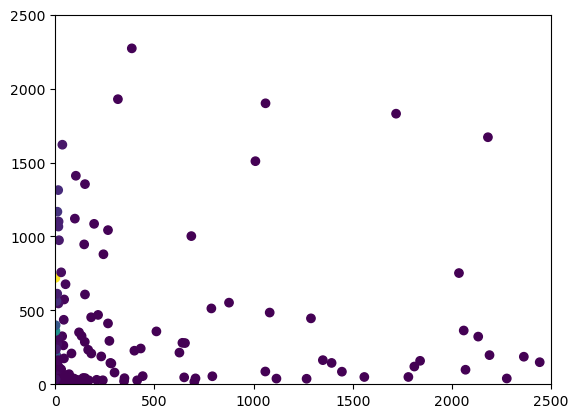

In [630]:
plt.scatter(Y, pred_Y, c=abs(error)/Y)
plt.xlim([0, 2500])
plt.ylim([0, 2500])

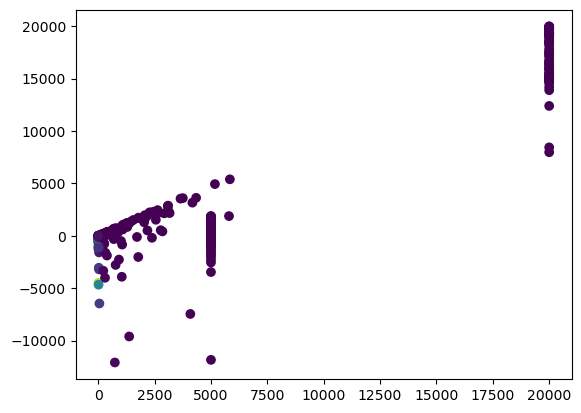

In [631]:
plt.scatter(Y, error, c=abs(error)/Y)

(-2500.0, 2500.0)

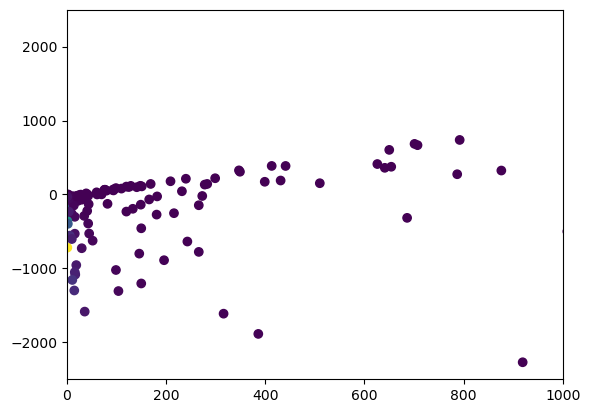

In [632]:
plt.scatter(x=Y,y=error, c=abs(error)/Y)
plt.xlim([0, 1000])
plt.ylim([-2500,2500])

# Fancy neural network for regression

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_layers, num_heads):
        super().__init__()
        
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dim_feedforward=hidden_dim), 
            num_layers=num_layers
        )
        self.output_layer = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = self.output_layer(x)
        return x

# Example usage:
input_dim = 13
output_dim = 1
hidden_dim = 64
num_layers = 2
num_heads = 1

model = TransformerRegressor(input_dim, output_dim, hidden_dim, num_layers, num_heads)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Generate some sample data
x = np.random.randn(100, input_dim).astype(np.float32)
y = np.random.randn(100, output_dim).astype(np.float32)

# Train the model
for epoch in range(100):
    optimizer.zero_grad()
    output = model(torch.from_numpy(x))
    loss = criterion(output, torch.from_numpy(y))
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1} Loss: {loss.item():.4f}")

In [450]:
# Define the neural network

class TransformerRegressor(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim, num_layers, num_heads):
        super().__init__()
        
        self.transformer_encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=input_dim, nhead=num_heads, dim_feedforward=hidden_dim), 
            num_layers=num_layers
        )
        self.output_layer = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.transformer_encoder(x)
        x = self.output_layer(x)
        return x
    
# Define the dataset class
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32).unsqueeze(1)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [477]:
# Load the data
data = pd.read_json("preprocessed_data.json")

# Identify indices where Y is equal to 5000 or 20000
indices_to_downsample = data[data["Y"].isin([1, 5000., 20000.])].index

# Randomly select a subset of indices to downsample
# You can specify the downsampling ratio or a desired number of samples
downsampling_ratio = 0.95
num_samples = 1000
selected_indices = np.random.choice(indices_to_downsample, size=int(len(indices_to_downsample) * downsampling_ratio), replace=False)

# Subset your dataframe using the selected indices
data_downsampled = data.drop(selected_indices)

<Axes: >

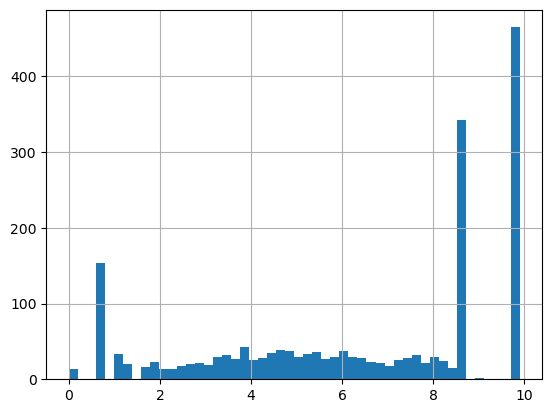

In [478]:
data["log(Y+1)"].hist(bins=50)

<Axes: >

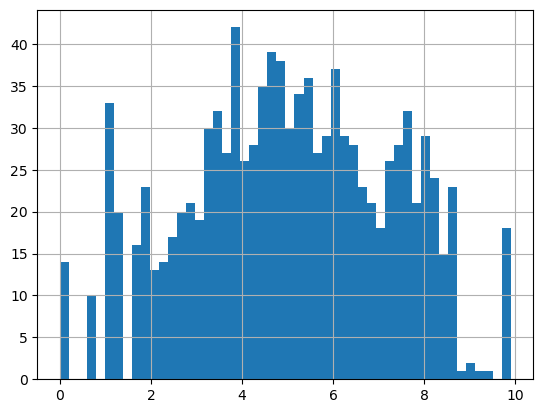

In [479]:
data_downsampled["log(Y+1)"].hist(bins=50)

In [558]:
data = data.copy()

# Separate the features and labels
nn_y = data["log(Y+1)"]
nn_X = data[["PCA1", "PCA2", "X2_X3_encoding"]]

# One-hot encode X2_X3_encoding column
nn_X = pd.get_dummies(nn_X, columns=["X2_X3_encoding"])

# Use "fold" column for specifying the cross-validation splits
fold_indices = [data["fold"].values == i for i in range(5)]


# Define the hyperparameters
input_dim = 13
output_dim = 1
hidden_dim = 64
num_layers = 2
num_heads = 1

learning_rate = 1e-4
n_epochs = 100
batch_size = 32


# Perform cross-validation
for i in range(1):

    # Split the data into training and testing sets for this fold
    X_train = nn_X.loc[~fold_indices[i], :]
    X_test = nn_X.loc[fold_indices[i], :]
    y_train = nn_y.loc[~fold_indices[i]]
    y_test = nn_y.loc[fold_indices[i]]

    # Load the data
    train_data = MyDataset(X_train, y_train)
    train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

    # Initialize the model, loss function, and optimizer
    model = TransformerRegressor(input_dim, output_dim, hidden_dim, num_layers, num_heads)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    model.train()
    for epoch in range(n_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_data)

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1} loss: {epoch_loss:.4f}")


Epoch 5 loss: 20.2119
Epoch 10 loss: 13.7908
Epoch 15 loss: 10.0520
Epoch 20 loss: 8.1200
Epoch 25 loss: 7.0103
Epoch 30 loss: 6.2707
Epoch 35 loss: 5.7476
Epoch 40 loss: 5.4458
Epoch 45 loss: 5.2146
Epoch 50 loss: 5.1078
Epoch 55 loss: 5.0274
Epoch 60 loss: 4.9751
Epoch 65 loss: 4.9332
Epoch 70 loss: 4.9310
Epoch 75 loss: 4.9011
Epoch 80 loss: 4.8965
Epoch 85 loss: 4.8614
Epoch 90 loss: 4.8604
Epoch 95 loss: 4.8390
Epoch 100 loss: 4.8244


In [559]:
# Iterate over the test data
test_data = MyDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=True)

model.eval()
with torch.no_grad():
    for inputs, y in test_loader:
        outputs = model(inputs)


# # Calculate evaluation metrics
mse = nn.MSELoss(reduction="none")(y, outputs)
L1 = nn.L1Loss(reduction="none")(y, outputs)

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse.mean():.4f}")
print(f"Mean Absolute Error (L1): {L1.mean():.4f}")

Mean Squared Error (MSE): 5.0406
Mean Absolute Error (L1): 1.8906


In [560]:
Y = np.exp(y)-1
pred_Y = np.exp(outputs)-1
error = Y - pred_Y

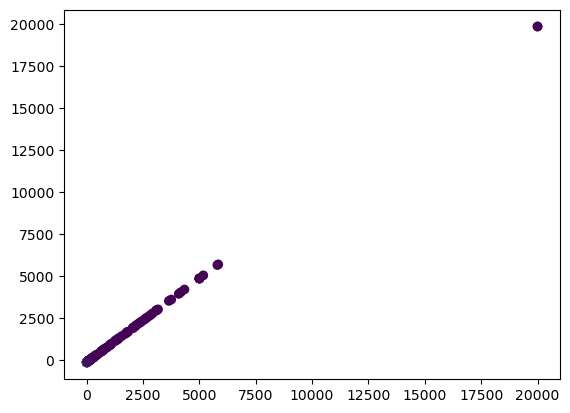

In [561]:
plt.scatter(Y, error, c=abs(error)/Y)

(-2500.0, 2500.0)

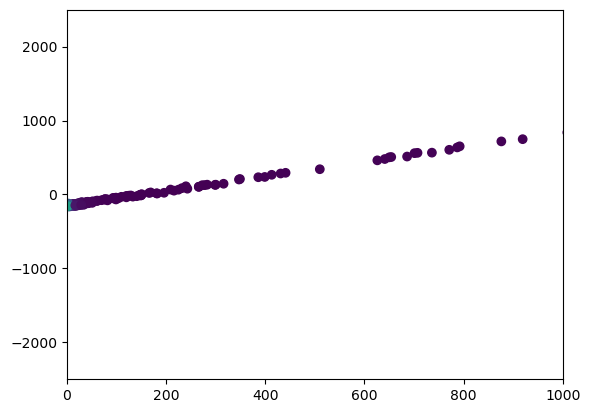

In [562]:
plt.scatter(x=Y,y=error, c=abs(error)/Y)
plt.xlim([0, 1000])
plt.ylim([-2500,2500])